Project 1: Student Performance Analysis - Exam Score Prediction

Libarary import

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Warning များကို ဖျောက်ရန်
import warnings
warnings.filterwarnings('ignore')

# Visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set_style('whitegrid')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


Data Load

In [2]:
# CSV ဖိုင်ကို load လုပ်ခြင်း
df = pd.read_csv('StudentPerformanceFactors.csv')

# Data ရဲ့ ပထမဆုံး ၅ ကြောင်း
print("📊 First 5 rows of the dataset:")
print("="*80)
print(df.head())
print("\n")

print("📊 Last 5 rows of the dataset:")
print("="*80)
print(df.tail())
print("\n")

print(f"📊 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

📊 First 5 rows of the dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teac

Data Check-Up

In [3]:
# Column အမည်များနဲ့ Data Type များ
print("📋 Column Information:")
print("="*80)
print(df.info())
print("\n")

# ကိန်းဂဏန်း data များရဲ့ စာရင်းအင်း
print("📊 Statistical Summary (Numerical Columns):")
print("="*80)
print(df.describe())
print("\n")

# အမျိုးအစားအလိုက် data များရဲ့ စာရင်းအင်း
print("📊 Statistical Summary (Categorical Columns):")
print("="*80)
print(df.describe(include=['object']))

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence            

Missing Values

In [4]:
# Missing values ရှိမရှိ စစ်ဆေးခြင်း
print("🔍 Missing Values Check:")
print("="*80)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

print(missing_df[missing_df['Missing Values'] > 0])

# Missing values ရှိတဲ့ column တွေကို အသေးစိတ်ကြည့်ခြင်း
print("\n📝 Columns with missing values:")
print("="*80)
for col in df.columns:
    if df[col].isnull().any():
        print(f"\n{col}:")
        print(df[df[col].isnull()][col].head())

🔍 Missing Values Check:
                          Missing Values  Percentage
Teacher_Quality                       78    1.180566
Parental_Education_Level              90    1.362192
Distance_from_Home                    67    1.014076

📝 Columns with missing values:

Teacher_Quality:
127    NaN
396    NaN
457    NaN
570    NaN
593    NaN
Name: Teacher_Quality, dtype: object

Parental_Education_Level:
240    NaN
408    NaN
417    NaN
451    NaN
592    NaN
Name: Parental_Education_Level, dtype: object

Distance_from_Home:
33     NaN
275    NaN
316    NaN
359    NaN
380    NaN
Name: Distance_from_Home, dtype: object


Data Cleaning

In [5]:
# Missing values များကို ဖြည့်ခြင်း
print("🧹 Data Cleaning Process:")
print("="*80)

# Teacher_Quality အတွက် - အများဆုံးတွေ့ရတဲ့ တန်ဖိုးနဲ့ ဖြည့်မယ်
if df['Teacher_Quality'].isnull().any():
    mode_value = df['Teacher_Quality'].mode()[0]
    df['Teacher_Quality'].fillna(mode_value, inplace=True)
    print(f"✓ Teacher_Quality: Filled with '{mode_value}'")

# Parental_Education_Level အတွက်
if df['Parental_Education_Level'].isnull().any():
    mode_value = df['Parental_Education_Level'].mode()[0]
    df['Parental_Education_Level'].fillna(mode_value, inplace=True)
    print(f"✓ Parental_Education_Level: Filled with '{mode_value}'")

# Distance_from_Home အတွက်
if df['Distance_from_Home'].isnull().any():
    mode_value = df['Distance_from_Home'].mode()[0]
    df['Distance_from_Home'].fillna(mode_value, inplace=True)
    print(f"✓ Distance_from_Home: Filled with '{mode_value}'")

# ကျန်တဲ့ missing values တွေ ရှိသေးလားစစ်ဆေး
print("\n📊 After cleaning - Missing values:")
print("="*80)
print(df.isnull().sum())

🧹 Data Cleaning Process:
✓ Teacher_Quality: Filled with 'Medium'
✓ Parental_Education_Level: Filled with 'High School'
✓ Distance_from_Home: Filled with 'Near'

📊 After cleaning - Missing values:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


Duplicate check-up

In [6]:
# Duplicate rows ရှိမရှိ စစ်ဆေး
print("🔍 Duplicate Check:")
print("="*80)
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

if duplicates > 0:
    # Duplicate တွေကို ဖယ်ရှားခြင်း
    df = df.drop_duplicates()
    print(f"✓ Removed {duplicates} duplicate rows")
    print(f"New dataset shape: {df.shape}")
else:
    print("✓ No duplicate rows found")

🔍 Duplicate Check:
Total duplicate rows: 0
✓ No duplicate rows found


Data Check-up again

In [7]:
# Clean လုပ်ပြီးတဲ့နောက် Data အချက်အလက်များ
print("📊 Final Dataset Information:")
print("="*80)
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")
print("\nColumn names:")
for col in df.columns:
    print(f"  - {col}")

📊 Final Dataset Information:
Total rows: 6607
Total columns: 20

Column names:
  - Hours_Studied
  - Attendance
  - Parental_Involvement
  - Access_to_Resources
  - Extracurricular_Activities
  - Sleep_Hours
  - Previous_Scores
  - Motivation_Level
  - Internet_Access
  - Tutoring_Sessions
  - Family_Income
  - Teacher_Quality
  - School_Type
  - Peer_Influence
  - Physical_Activity
  - Learning_Disabilities
  - Parental_Education_Level
  - Distance_from_Home
  - Gender
  - Exam_Score


Numerical Change

In [9]:
# Label Encoder အတွက် dictionary ဆောက်မယ်
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

print("🔄 Encoding Categorical Variables:")
print("="*80)

for col in categorical_columns:
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"✓ {col}: {len(le.classes_)} unique values → Encoded")

# ပြောင်းလဲပြီးတဲ့ Data ကိုကြည့်ခြင်း
print("\n📊 First 5 rows with encoded columns:")
print("="*80)
encoded_cols = [col for col in df.columns if '_encoded' in col]
print(df[['Exam_Score'] + encoded_cols].head())

🔄 Encoding Categorical Variables:
✓ Parental_Involvement: 3 unique values → Encoded
✓ Access_to_Resources: 3 unique values → Encoded
✓ Extracurricular_Activities: 2 unique values → Encoded
✓ Motivation_Level: 3 unique values → Encoded
✓ Internet_Access: 2 unique values → Encoded
✓ Family_Income: 3 unique values → Encoded
✓ Teacher_Quality: 3 unique values → Encoded
✓ School_Type: 2 unique values → Encoded
✓ Peer_Influence: 3 unique values → Encoded
✓ Learning_Disabilities: 2 unique values → Encoded
✓ Parental_Education_Level: 3 unique values → Encoded
✓ Distance_from_Home: 3 unique values → Encoded
✓ Gender: 2 unique values → Encoded

📊 First 5 rows with encoded columns:
   Exam_Score  Parental_Involvement_encoded  Access_to_Resources_encoded  \
0          67                             1                            0   
1          61                             1                            2   
2          74                             2                            2   
3          71   

Feature & Target

In [10]:
# Feature (X) နဲ့ Target (y) ခွဲခြားခြင်း
# Target variable က Exam_Score ဖြစ်တယ်
# Original categorical columns တွေကို ဖယ်ပြီး encoded columns တွေကိုသာ သုံးမယ်

# မူရင်း categorical columns တွေကို ဖယ်ရှား
cols_to_drop = list(categorical_columns) + ['Exam_Score']
X = df.drop(columns=cols_to_drop)
y = df['Exam_Score']

print("🎯 Feature Matrix (X):")
print("="*80)
print(f"Shape: {X.shape}")
print(f"Features: {list(X.columns)}")
print("\n")
print("🎯 Target Variable (y):")
print("="*80)
print(f"Shape: {y.shape}")
print(f"Range: {y.min()} to {y.max()}")
print(f"Mean: {y.mean():.2f}")
print(f"Median: {y.median():.2f}")

🎯 Feature Matrix (X):
Shape: (6607, 19)
Features: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement_encoded', 'Access_to_Resources_encoded', 'Extracurricular_Activities_encoded', 'Motivation_Level_encoded', 'Internet_Access_encoded', 'Family_Income_encoded', 'Teacher_Quality_encoded', 'School_Type_encoded', 'Peer_Influence_encoded', 'Learning_Disabilities_encoded', 'Parental_Education_Level_encoded', 'Distance_from_Home_encoded', 'Gender_encoded']


🎯 Target Variable (y):
Shape: (6607,)
Range: 55 to 101
Mean: 67.24
Median: 67.00


Train_Test Split

In [11]:
# Data ကို train (80%) နဲ့ test (20%) အဖြစ်ခွဲမယ်
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print("📊 Train-Test Split:")
print("="*80)
print(f"Training set size: {X_train.shape[0]} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nFeatures in training: {X_train.shape[1]}")

📊 Train-Test Split:
Training set size: 5285 samples (80.0%)
Test set size: 1322 samples (20.0%)

Features in training: 19


Feature Scaling

In [12]:
# Numerical features တွေကို scale လုပ်မယ်
scaler = StandardScaler()

# Training data ကို fit လုပ်ပြီး transform လုပ်
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame အဖြစ်ပြောင်းမယ် (နားလည်ရလွယ်အောင်)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("📊 Feature Scaling Results:")
print("="*80)
print("Before Scaling (first 5 rows of Training data):")
print(X_train[['Hours_Studied', 'Attendance', 'Sleep_Hours']].head())
print("\nAfter Scaling (first 5 rows):")
print(X_train_scaled[['Hours_Studied', 'Attendance', 'Sleep_Hours']].head())

📊 Feature Scaling Results:
Before Scaling (first 5 rows of Training data):
      Hours_Studied  Attendance  Sleep_Hours
5810             27          79            8
1268             16          86            7
414              22          87            8
4745             18         100           10
654              35          78           10

After Scaling (first 5 rows):
   Hours_Studied  Attendance  Sleep_Hours
0       1.173579   -0.075846     0.669094
1      -0.661983    0.531894    -0.016740
2       0.339232    0.618714     0.669094
3      -0.328245    1.747376     2.040764
4       2.508533   -0.162667     2.040764


Model ၁ - Linear Regression

In [13]:
# Linear Regression Model ဆောက်မယ်
print("📈 Model 1: Linear Regression")
print("="*80)

# Model ကို train လုပ်ခြင်း
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions လုပ်ခြင်း
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Model evaluation
print("\n📊 Model Performance:")
print("-"*40)
print(f"Training R² Score: {r2_score(y_train, y_train_pred_lr):.4f}")
print(f"Testing R² Score: {r2_score(y_test, y_test_pred_lr):.4f}")
print(f"\nTraining RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_lr)):.2f}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_lr)):.2f}")
print(f"\nTraining MAE: {mean_absolute_error(y_train, y_train_pred_lr):.2f}")
print(f"Testing MAE: {mean_absolute_error(y_test, y_test_pred_lr):.2f}")

📈 Model 1: Linear Regression

📊 Model Performance:
----------------------------------------
Training R² Score: 0.6431
Testing R² Score: 0.6888

Training RMSE: 2.34
Testing RMSE: 2.10

Training MAE: 1.07
Testing MAE: 1.02


Model 2 - Random Forest

In [14]:
# Random Forest Model ဆောက်မယ်
print("🌲 Model 2: Random Forest Regressor")
print("="*80)

# Model ကို train လုပ်ခြင်း
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

# Predictions လုပ်ခြင်း
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Model evaluation
print("\n📊 Model Performance:")
print("-"*40)
print(f"Training R² Score: {r2_score(y_train, y_train_pred_rf):.4f}")
print(f"Testing R² Score: {r2_score(y_test, y_test_pred_rf):.4f}")
print(f"\nTraining RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_rf)):.2f}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_rf)):.2f}")
print(f"\nTraining MAE: {mean_absolute_error(y_train, y_train_pred_rf):.2f}")
print(f"Testing MAE: {mean_absolute_error(y_test, y_test_pred_rf):.2f}")

🌲 Model 2: Random Forest Regressor

📊 Model Performance:
----------------------------------------
Training R² Score: 0.9049
Testing R² Score: 0.6460

Training RMSE: 1.21
Testing RMSE: 2.24

Training MAE: 0.76
Testing MAE: 1.19


Model Compare

In [15]:
# Model နှစ်ခုရဲ့ စွမ်းဆောင်ရည်ကို နှိုင်းယှဉ်မယ်
print("⚖️ Model Comparison")
print("="*80)

comparison_data = {
    'Metric': ['R² Score (Train)', 'R² Score (Test)', 'RMSE (Train)', 'RMSE (Test)', 'MAE (Train)', 'MAE (Test)'],
    'Linear Regression': [
        f"{r2_score(y_train, y_train_pred_lr):.4f}",
        f"{r2_score(y_test, y_test_pred_lr):.4f}",
        f"{np.sqrt(mean_squared_error(y_train, y_train_pred_lr)):.2f}",
        f"{np.sqrt(mean_squared_error(y_test, y_test_pred_lr)):.2f}",
        f"{mean_absolute_error(y_train, y_train_pred_lr):.2f}",
        f"{mean_absolute_error(y_test, y_test_pred_lr):.2f}"
    ],
    'Random Forest': [
        f"{r2_score(y_train, y_train_pred_rf):.4f}",
        f"{r2_score(y_test, y_test_pred_rf):.4f}",
        f"{np.sqrt(mean_squared_error(y_train, y_train_pred_rf)):.2f}",
        f"{np.sqrt(mean_squared_error(y_test, y_test_pred_rf)):.2f}",
        f"{mean_absolute_error(y_train, y_train_pred_rf):.2f}",
        f"{mean_absolute_error(y_test, y_test_pred_rf):.2f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

⚖️ Model Comparison
          Metric Linear Regression Random Forest
R² Score (Train)            0.6431        0.9049
 R² Score (Test)            0.6888        0.6460
    RMSE (Train)              2.34          1.21
     RMSE (Test)              2.10          2.24
     MAE (Train)              1.07          0.76
      MAE (Test)              1.02          1.19


Feature Importance

🌟 Feature Importance (Random Forest)

Top 10 Most Important Features:
----------------------------------------
Attendance               : 0.4026 (40.26%)
Hours_Studied            : 0.2545 (25.45%)
Previous_Scores          : 0.0857 (8.57%)
Tutoring_Sessions        : 0.0322 (3.22%)
Access_to_Resources_encoded: 0.0268 (2.68%)
Sleep_Hours              : 0.0259 (2.59%)
Physical_Activity        : 0.0257 (2.57%)
Parental_Involvement_encoded: 0.0256 (2.56%)
Family_Income_encoded    : 0.0177 (1.77%)
Peer_Influence_encoded   : 0.0159 (1.59%)


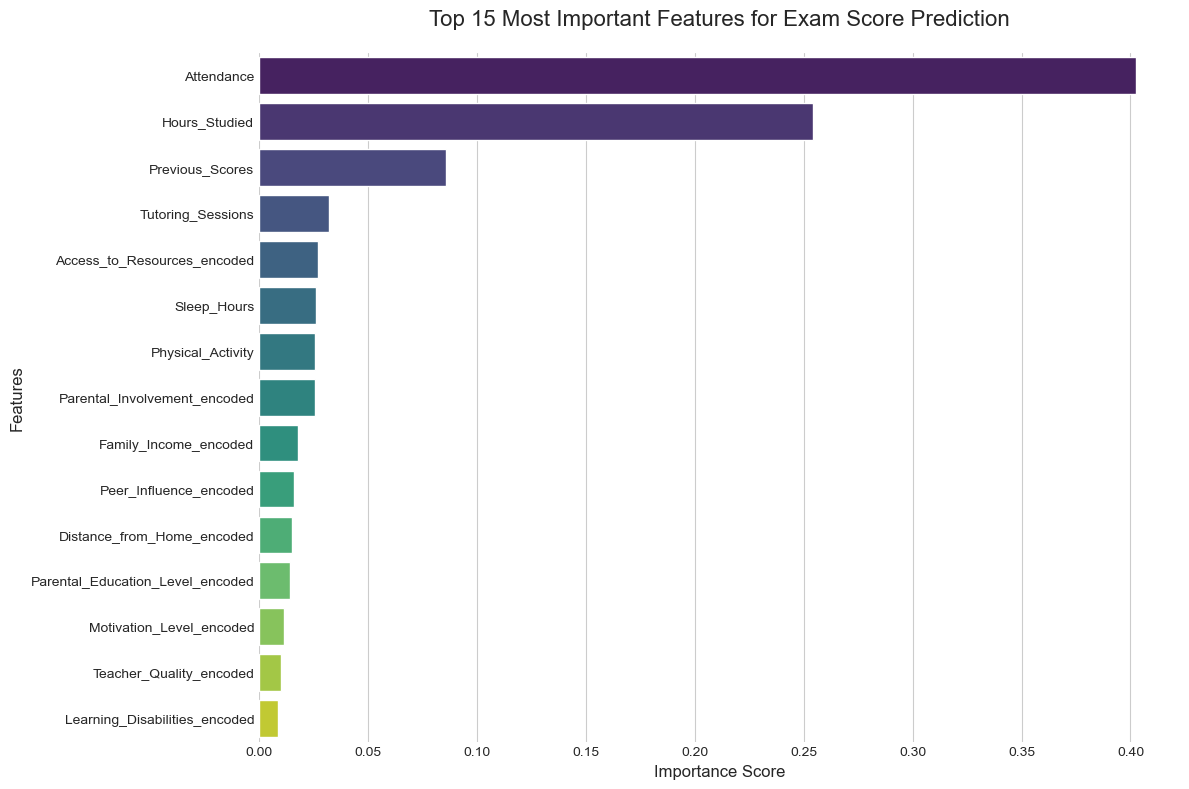

In [16]:
# Random Forest က feature importance ကို လေ့လာမယ်
print("🌟 Feature Importance (Random Forest)")
print("="*80)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print("-"*40)
for idx, row in feature_importance.head(10).iterrows():
    print(f"{row['feature']:25s}: {row['importance']:.4f} ({row['importance']*100:.2f}%)")

# Visualization
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title('Top 15 Most Important Features for Exam Score Prediction', fontsize=16, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

Predictions vs Actual

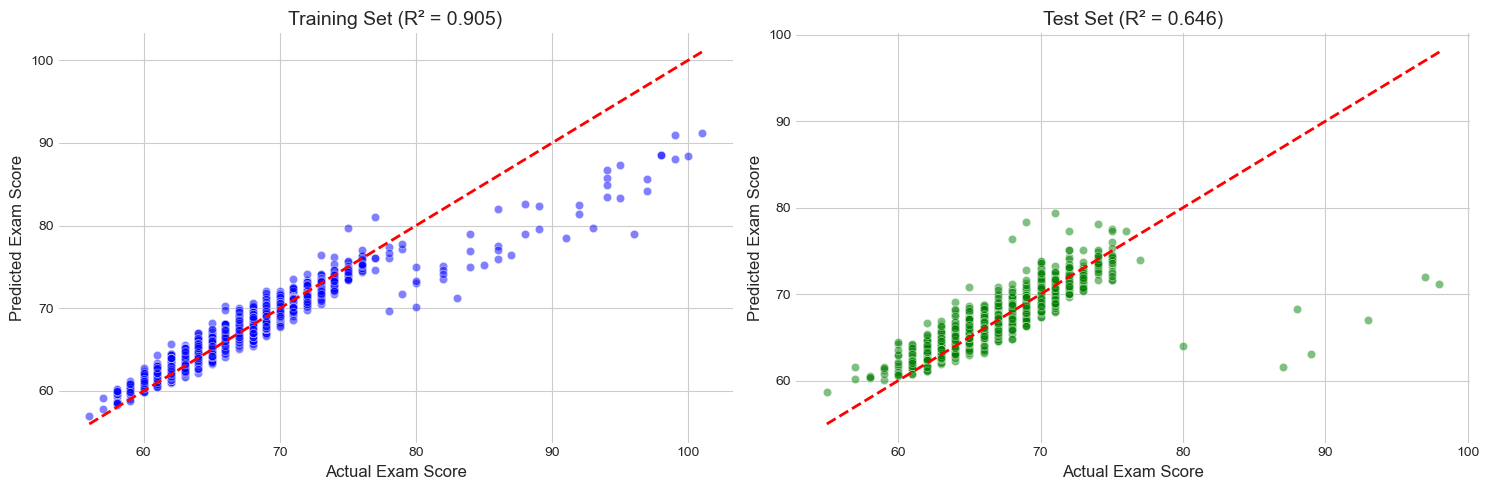

In [17]:
# Random Forest ရဲ့ predictions တွေကို actual values နဲ့ နှိုင်းယှဉ်မယ်
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_rf, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score', fontsize=12)
plt.ylabel('Predicted Exam Score', fontsize=12)
plt.title(f'Training Set (R² = {r2_score(y_train, y_train_pred_rf):.3f})', fontsize=14)

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, alpha=0.5, c='green', edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score', fontsize=12)
plt.ylabel('Predicted Exam Score', fontsize=12)
plt.title(f'Test Set (R² = {r2_score(y_test, y_test_pred_rf):.3f})', fontsize=14)

plt.tight_layout()
plt.show()

Residuals 

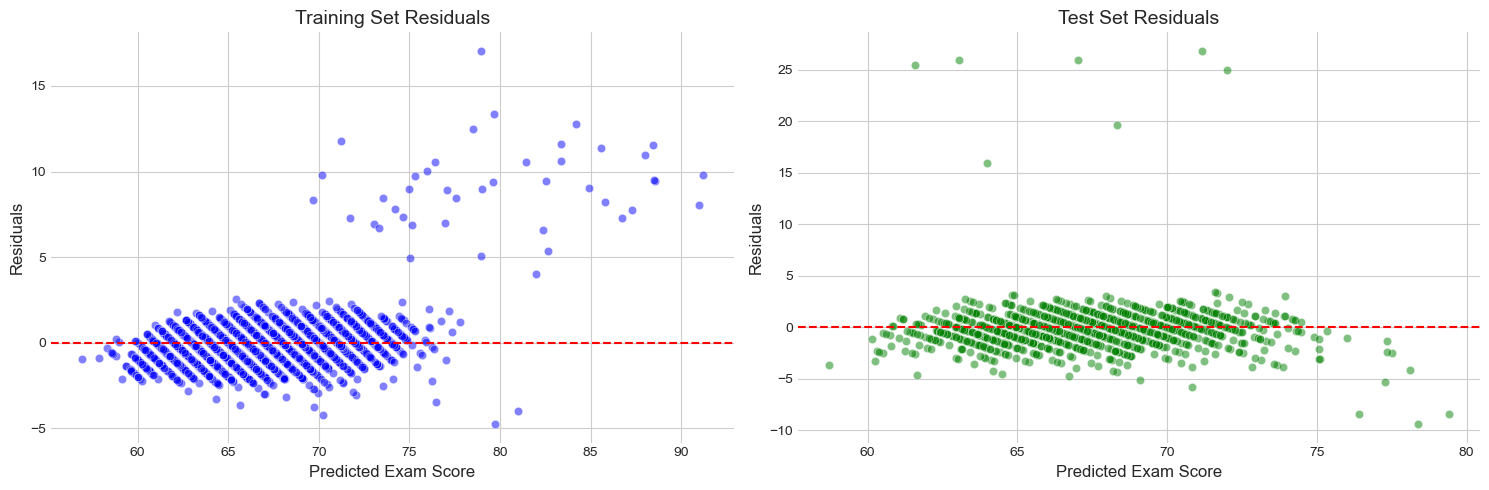

📊 Residual Statistics:
Mean of residuals (test): -0.10
Std of residuals (test): 2.24
Max overestimation: 26.84
Max underestimation: -9.37


In [18]:
# Residuals (errors) တွေကို လေ့လာမယ်
plt.figure(figsize=(15, 5))

# Training residuals
plt.subplot(1, 2, 1)
residuals_train = y_train - y_train_pred_rf
plt.scatter(y_train_pred_rf, residuals_train, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Exam Score', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Training Set Residuals', fontsize=14)

# Test residuals
plt.subplot(1, 2, 2)
residuals_test = y_test - y_test_pred_rf
plt.scatter(y_test_pred_rf, residuals_test, alpha=0.5, c='green', edgecolors='w', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Exam Score', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Test Set Residuals', fontsize=14)

plt.tight_layout()
plt.show()

print(f"📊 Residual Statistics:")
print(f"Mean of residuals (test): {residuals_test.mean():.2f}")
print(f"Std of residuals (test): {residuals_test.std():.2f}")
print(f"Max overestimation: {residuals_test.max():.2f}")
print(f"Max underestimation: {residuals_test.min():.2f}")

Cross-Validation

🔄 Cross-Validation Results (5-fold)
Linear Regression CV R² scores: ['0.7034', '0.7218', '0.6762', '0.6478', '0.4927']
Mean CV R²: 0.6484 (+/- 0.1635)

Random Forest CV R² scores: ['0.6642', '0.6689', '0.6431', '0.5976', '0.4632']
Mean CV R²: 0.6074 (+/- 0.1528)


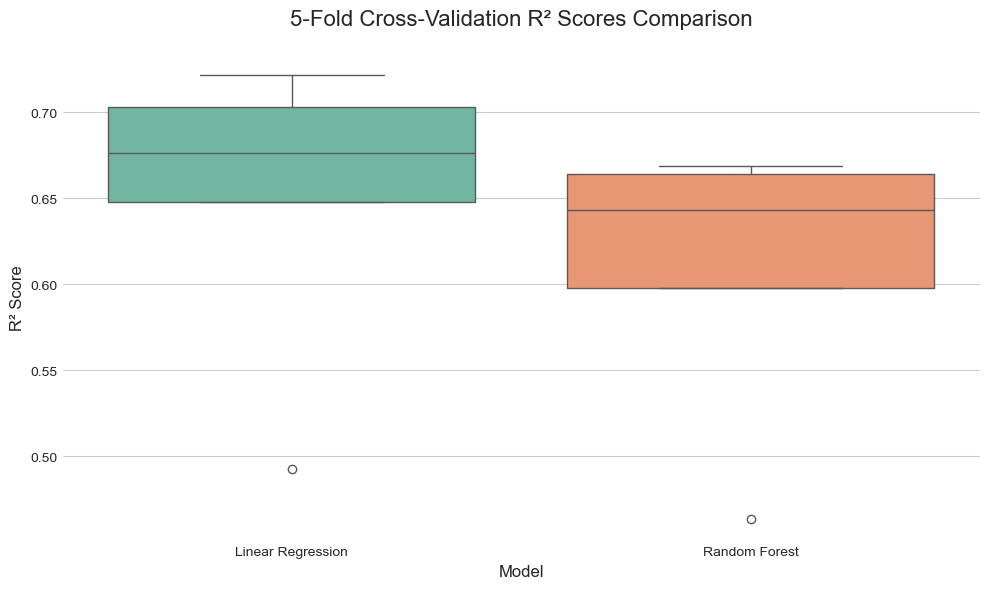

In [19]:
# 5-fold cross validation လုပ်မယ်
print("🔄 Cross-Validation Results (5-fold)")
print("="*80)

# Linear Regression CV
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Linear Regression CV R² scores: {[f'{score:.4f}' for score in lr_cv_scores]}")
print(f"Mean CV R²: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std()*2:.4f})")

# Random Forest CV
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"\nRandom Forest CV R² scores: {[f'{score:.4f}' for score in rf_cv_scores]}")
print(f"Mean CV R²: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std()*2:.4f})")

# Visualization
plt.figure(figsize=(10, 6))
models = ['Linear Regression'] * 5 + ['Random Forest'] * 5
scores = list(lr_cv_scores) + list(rf_cv_scores)
sns.boxplot(x=models, y=scores, palette='Set2')
plt.title('5-Fold Cross-Validation R² Scores Comparison', fontsize=16, pad=20)
plt.ylabel('R² Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.tight_layout()
plt.show()

Error Distribution

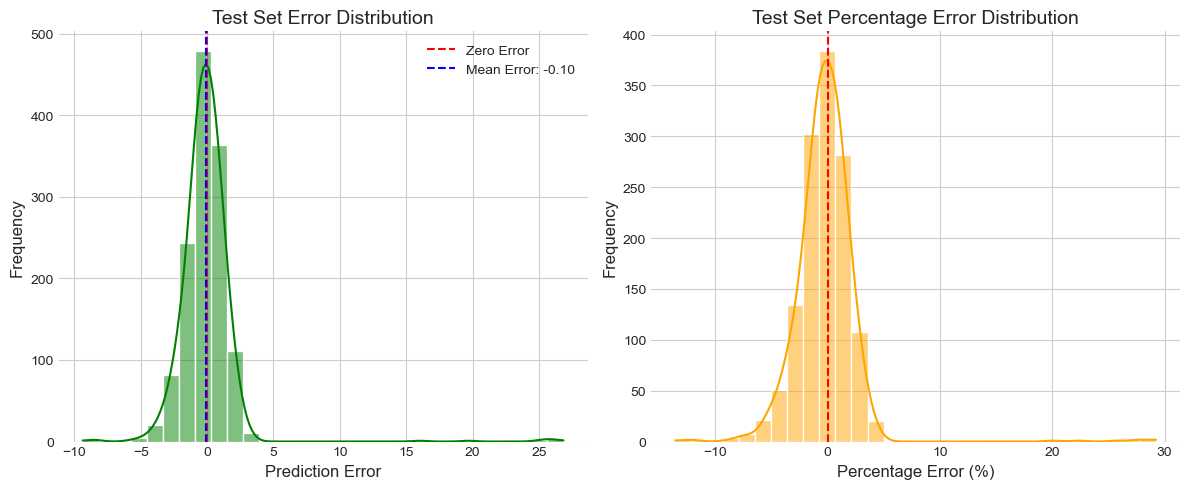


📊 Error Analysis:
Mean Absolute Percentage Error: 1.73%
Median Absolute Percentage Error: 1.25%
95% of errors are within: 4.25%


In [20]:
# Prediction errors ရဲ့ distribution ကိုလေ့လာမယ်
plt.figure(figsize=(12, 5))

# Test set errors
plt.subplot(1, 2, 1)
errors_test = y_test - y_test_pred_rf
sns.histplot(errors_test, bins=30, kde=True, color='green')
plt.axvline(x=0, color='r', linestyle='--', label='Zero Error')
plt.axvline(x=errors_test.mean(), color='blue', linestyle='--', label=f'Mean Error: {errors_test.mean():.2f}')
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Test Set Error Distribution', fontsize=14)
plt.legend()

# Error ရဲ့ ရာခိုင်နှုန်း
plt.subplot(1, 2, 2)
percentage_errors = (errors_test / y_test) * 100
sns.histplot(percentage_errors, bins=30, kde=True, color='orange')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Percentage Error (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Test Set Percentage Error Distribution', fontsize=14)

plt.tight_layout()
plt.show()

print(f"\n📊 Error Analysis:")
print(f"Mean Absolute Percentage Error: {np.mean(np.abs(percentage_errors)):.2f}%")
print(f"Median Absolute Percentage Error: {np.median(np.abs(percentage_errors)):.2f}%")
print(f"95% of errors are within: {np.percentile(np.abs(percentage_errors), 95):.2f}%")

Final Model

In [21]:
# အကောင်းဆုံး Model (Random Forest) ကိုသုံးပြီး နမူနာ ခန့်မှန်းချက်များ လုပ်မယ်
print("🎯 Sample Predictions using Random Forest Model")
print("="*80)

# Test set ထဲက နမူနာ ၁၀ ခုကို ရွေးမယ်
sample_indices = np.random.choice(len(X_test), 10, replace=False)

print("\nSample Predictions (Test Set):")
print("-"*60)
print(f"{'Actual':>10} {'Predicted':>12} {'Error':>10} {'Error %':>10}")
print("-"*60)

for idx in sample_indices:
    actual = y_test.iloc[idx]
    predicted = y_test_pred_rf[idx]
    error = predicted - actual
    error_pct = (error / actual) * 100
    
    print(f"{actual:10.2f} {predicted:12.2f} {error:10.2f} {error_pct:10.2f}%")

print("-"*60)
print(f"\n📊 Prediction Statistics:")
print(f"Average prediction error: {np.mean(y_test_pred_rf[sample_indices] - y_test.iloc[sample_indices]):.2f}")
print(f"RMSE on these samples: {np.sqrt(mean_squared_error(y_test.iloc[sample_indices], y_test_pred_rf[sample_indices])):.2f}")

🎯 Sample Predictions using Random Forest Model

Sample Predictions (Test Set):
------------------------------------------------------------
    Actual    Predicted      Error    Error %
------------------------------------------------------------
     67.00        67.18       0.18       0.28%
     60.00        61.04       1.04       1.73%
     71.00        72.48       1.48       2.08%
     66.00        65.84      -0.16      -0.24%
     72.00        70.04      -1.96      -2.73%
     69.00        67.83      -1.17      -1.69%
     67.00        66.83      -0.17      -0.25%
     68.00        68.90       0.90       1.33%
     69.00        69.75       0.75       1.09%
     72.00        72.17       0.17       0.24%
------------------------------------------------------------

📊 Prediction Statistics:
Average prediction error: 0.11
RMSE on these samples: 1.00


Summary

In [23]:
print("📋 PROJECT SUMMARY")
print("="*80)
print("""
🎯 Project Objective: Predict student exam scores based on various factors
📊 Dataset: {} students, {} features
""".format(len(df), X.shape[1]))

print("\n🔍 Key Findings:")
print("-"*40)

# အရေးကြီးဆုံး features ၃ ခု
top_3_features = feature_importance.head(3)['feature'].tolist()
print("1. Most important factors for exam performance:")
for i, feature in enumerate(top_3_features, 1):
    original_name = feature.replace('_encoded', '')
    importance = feature_importance[feature_importance['feature']==feature]['importance'].values[0]
    print(f"   {i}. {original_name}: {importance*100:.1f}% importance")

# Model performance
print(f"\n2. Best Model: Random Forest Regressor")
print(f"   - Test R² Score: {r2_score(y_test, y_test_pred_rf):.4f}")
print(f"   - Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_rf)):.2f} points")
print(f"   - Test MAE: {mean_absolute_error(y_test, y_test_pred_rf):.2f} points")

# Prediction accuracy
print(f"\n3. Prediction Accuracy:")
print(f"   - Average error: ±{mean_absolute_error(y_test, y_test_pred_rf):.2f} points")
print(f"   - 95% of predictions are within ±{np.percentile(np.abs(y_test - y_test_pred_rf), 95):.2f} points")

print("\n" + "="*80)
print("✅ Project Completed Successfully!")
print("="*80)

📋 PROJECT SUMMARY

🎯 Project Objective: Predict student exam scores based on various factors
📊 Dataset: 6607 students, 19 features


🔍 Key Findings:
----------------------------------------
1. Most important factors for exam performance:
   1. Attendance: 40.3% importance
   2. Hours_Studied: 25.4% importance
   3. Previous_Scores: 8.6% importance

2. Best Model: Random Forest Regressor
   - Test R² Score: 0.6460
   - Test RMSE: 2.24 points
   - Test MAE: 1.19 points

3. Prediction Accuracy:
   - Average error: ±1.19 points
   - 95% of predictions are within ±2.80 points

✅ Project Completed Successfully!
